# K Sivarama Krishna



# BL.EN.U4AIE21063

# A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

In [1]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

bhanumathi_weds_rajat_features = extract_features('Bhanumati_weds_rajat.wav')
bharat_features = extract_features('Bharat.wav')

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


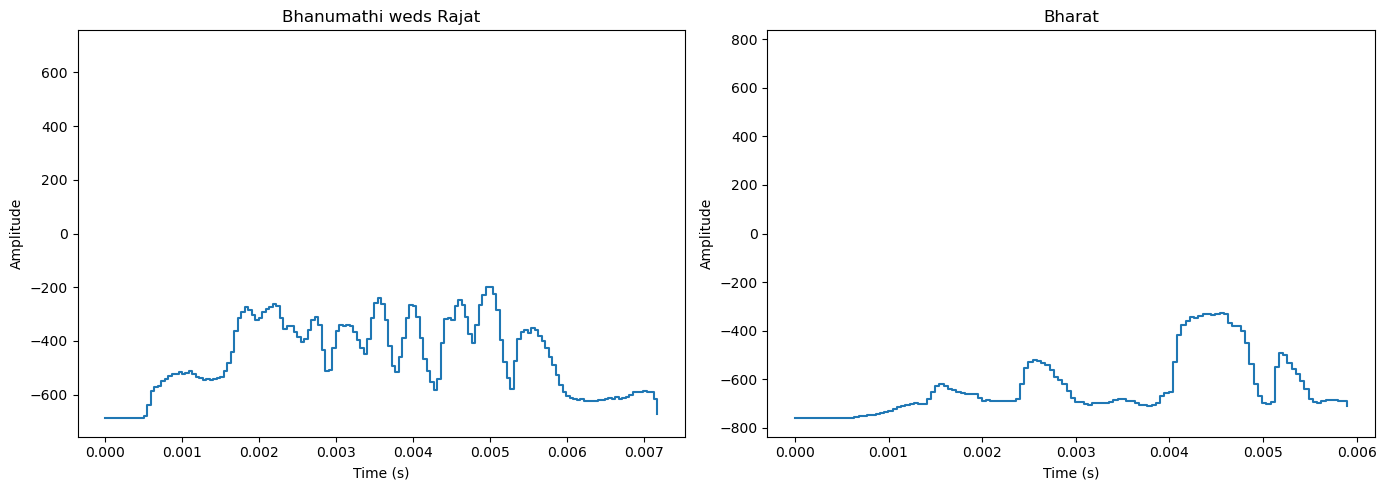

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr
bhanumathi_weds_rajat_features, sr1 = extract_features('Bhanumati_weds_rajat.wav')
bharat_features, sr2 = extract_features('Bharat.wav')

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1)
plt.title('Bhanumathi weds Rajat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
librosa.display.waveshow(bharat_features, sr=sr2)
plt.title('Bharat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# A2. Speak the sentence “Bhanumathi weds Rajat” (भानुमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). Construct speech for the word “Bharat” (భారత్ || भारत || ಭರತ್ || பாரத்) by combining segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this word speech generated and note down the issues associated with this approach of speech synthesis. The string written Indian scripts may have some error. Please validate before using.

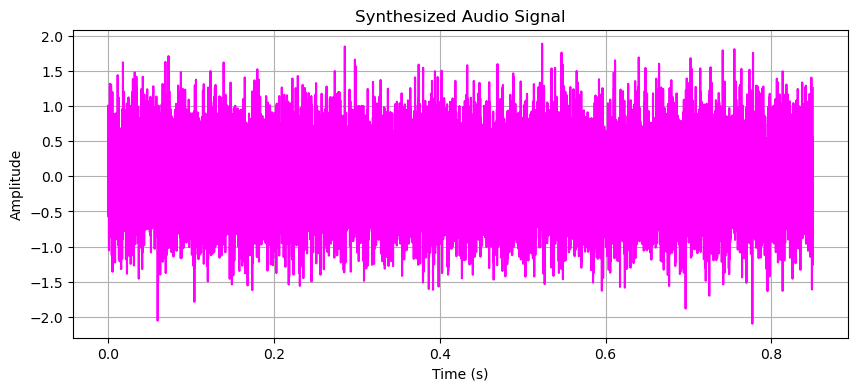

In [11]:
import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
phonemes_bharat = ['B', 'AA', 'R', 'AH', 'T']
phoneme_durations_bharat = [0.15, 0.1, 0.15, 0.2, 0.25]  

synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes_bharat, phoneme_durations_bharat):
    sr = 22050 
    audio_segment = np.random.randn(int(sr * duration)) * 0.5  # Generating the white noise
    synthesized_audio = np.append(synthesized_audio, audio_segment)
sf.write('synthesized_bharat1.wav', synthesized_audio, sr)

# Plottting the signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthesized_audio)) / sr, synthesized_audio,color ='magenta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Audio Signal')
plt.grid(True)
plt.show()
ipd.Audio('synthesized_bharat1.wav')
